# Regularized data programming with maximum a posteriori estimation

**Demo of code base on TubeSpam.**

## Preamble

In [1]:
# Importations.
import pandas as pd
import numpy as np
import torch
from bayesian_dp import BayesianDP
from utils import Utils
from train_test import Trainer

## Read data

In [2]:
# Read in labeling function matrix files.
df_train = pd.read_csv("../data/TubeSpam/TubeSpam_lf_matrix_train.csv")
df_val = pd.read_csv("../data/TubeSpam/TubeSpam_lf_matrix_val.csv")
df_test = pd.read_csv("../data/TubeSpam/TubeSpam_lf_matrix_test.csv")

# Explore.
print("\n---------------------------")
print("TRAINING DATA:")
print("---------------------------\n")
print(df_train.info())
display(df_train)

print("---------------------------")
print("VALIDATION DATA:")
print("---------------------------\n")
print(df_val.info())
display(df_val)

print("---------------------------")
print("TEST DATA:")
print("---------------------------\n")
print(df_test.info())
display(df_test)


---------------------------
TRAINING DATA:
---------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407 entries, 0 to 1406
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   0        1407 non-null   int64
 1   1        1407 non-null   int64
 2   2        1407 non-null   int64
 3   3        1407 non-null   int64
 4   4        1407 non-null   int64
 5   5        1407 non-null   int64
 6   6        1407 non-null   int64
 7   7        1407 non-null   int64
 8   8        1407 non-null   int64
 9   9        1407 non-null   int64
 10  Label    1407 non-null   int64
 11  Snorkel  1407 non-null   int64
dtypes: int64(12)
memory usage: 132.0 KB
None


,0,1,2,3,4,5,6,7,8,9,Label,Snorkel
0,0,0,0,0,0,0,0,0,0,0,-1,0
1,0,1,0,0,0,0,-1,0,0,-1,1,-1
2,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,-1,0,-1,0,0,0,-1,-1
4,0,0,0,0,0,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1402,0,0,0,0,0,0,-1,0,0,0,-1,-1
1403,1,0,0,0,0,1,0,0,0,0,1,1
1404,0,0,0,0,0,1,0,0,0,0,1,1
1405,0,0,0,0,0,1,0,0,0,-1,1,1


---------------------------
VALIDATION DATA:
---------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   0        157 non-null    int64
 1   1        157 non-null    int64
 2   2        157 non-null    int64
 3   3        157 non-null    int64
 4   4        157 non-null    int64
 5   5        157 non-null    int64
 6   6        157 non-null    int64
 7   7        157 non-null    int64
 8   8        157 non-null    int64
 9   9        157 non-null    int64
 10  Label    157 non-null    int64
 11  Snorkel  157 non-null    int64
dtypes: int64(12)
memory usage: 14.8 KB
None


,0,1,2,3,4,5,6,7,8,9,Label,Snorkel
0,0,0,0,0,-1,0,-1,0,0,0,-1,-1
1,1,0,0,0,0,1,0,0,0,-1,1,1
2,0,0,0,0,-1,0,0,0,0,-1,-1,-1
3,0,0,0,0,0,1,0,0,0,0,1,1
4,0,0,0,0,-1,0,0,0,0,0,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
152,1,1,0,1,-1,1,0,0,0,-1,1,1
153,0,0,0,0,-1,0,0,0,0,0,-1,-1
154,0,0,0,0,0,1,0,0,0,0,1,1
155,0,0,0,0,0,1,0,0,0,0,1,1


---------------------------
TEST DATA:
---------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   0        392 non-null    int64
 1   1        392 non-null    int64
 2   2        392 non-null    int64
 3   3        392 non-null    int64
 4   4        392 non-null    int64
 5   5        392 non-null    int64
 6   6        392 non-null    int64
 7   7        392 non-null    int64
 8   8        392 non-null    int64
 9   9        392 non-null    int64
 10  Label    392 non-null    int64
 11  Snorkel  392 non-null    int64
dtypes: int64(12)
memory usage: 36.9 KB
None


,0,1,2,3,4,5,6,7,8,9,Label,Snorkel
0,0,0,0,0,0,0,0,0,0,0,-1,0
1,0,0,0,0,-1,0,0,0,0,0,-1,-1
2,0,0,0,0,-1,0,0,0,0,-1,-1,-1
3,0,0,0,0,0,0,-1,-1,0,0,-1,-1
4,1,0,0,0,0,1,0,0,0,-1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
387,0,0,0,0,0,0,0,0,0,0,-1,0
388,0,0,0,0,0,0,-1,0,0,0,-1,-1
389,1,0,1,0,0,0,0,0,0,-1,1,1
390,0,0,0,0,0,0,-1,0,0,-1,-1,-1


## Process data

In [3]:
# Spam dataset: Disaggregate labeling function outputs and gold labels.
# Drop third and final LF.
L_train = np.array(df_train.drop(columns = ["Label", "Snorkel"]))
y_train = np.array(df_train["Label"])

L_val = np.array(df_val.drop(columns = ["Label", "Snorkel"]))
y_val = np.array(df_val["Label"])

L_test = np.array(df_test.drop(columns = ["Label", "Snorkel"]))
y_test = np.array(df_test["Label"])

print("\n***L_train.shape =", L_train.shape)
display(L_train[:10])
print("\n***L_val.shape =", L_val.shape)
display(L_val[:10])
print("\n***L_test.shape =", L_test.shape)
display(L_test[:10])

display(y_train[:10])
display(y_val[:10])
display(y_test[:10])


***L_train.shape = (1407, 10)


array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0, -1,  0,  0, -1],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, -1,  0, -1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0, -1],
       [ 1,  0,  0,  1, -1,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, -1],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0]])


***L_val.shape = (157, 10)


array([[ 0,  0,  0,  0, -1,  0, -1,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  1,  0,  0,  0, -1],
       [ 0,  0,  0,  0, -1,  0,  0,  0,  0, -1],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0, -1,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, -1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0, -1],
       [ 1,  1,  0,  1,  0,  0,  0,  0,  0, -1],
       [ 0,  0,  0,  0, -1,  0, -1,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0,  0,  0]])


***L_test.shape = (392, 10)


array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, -1,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, -1,  0,  0,  0,  0, -1],
       [ 0,  0,  0,  0,  0,  0, -1, -1,  0,  0],
       [ 1,  0,  0,  0,  0,  1,  0,  0,  0, -1],
       [ 1,  1,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, -1],
       [ 0,  0,  0,  0,  0,  0, -1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0, -1],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, -1]])

array([-1,  1,  1, -1,  1,  1,  1, -1, -1,  1])

array([-1,  1, -1,  1, -1, -1,  1,  1, -1,  1])

array([-1, -1, -1, -1,  1,  1, -1, -1,  1,  1])

## Training config

In [4]:
# Total labeling functions.
M = L_train.shape[1]

# Compute empirical betas for training data.
empirical_coverage = []
for i in range(L_train.shape[1]):
    coverage = np.count_nonzero(L_train[:, i]) / L_train.shape[0]
    empirical_coverage.append(coverage)
print("Empirical coverages =\n", empirical_coverage)

# Macros for present experiments.
EPOCHS = 250
LEARNING_RATE = 0.01
TIE_POLICY = "abstain"
INIT_ALPHA = [1.0] * M
INIT_BETA = empirical_coverage
STRENGTH = 10
CLIP_GRADS = 10
OPTIMIZER = torch.optim.SGD
FORCE_ABSTAIN = True

Empirical coverages =
 [0.19047619047619047, 0.11727078891257996, 0.1044776119402985, 0.1044776119402985, 0.15991471215351813, 0.2281449893390192, 0.24946695095948826, 0.1044776119402985, 0.0511727078891258, 0.38521677327647474]


In [5]:
# Instantiate Utils object for utility functions.
utils = Utils()

# Instantiate trainer.
trainer = Trainer()

In [6]:
print("\nTotal LFs =", M)


Total LFs = 10


## Majority vote scores


---------------------------------------------
tn, fp, fn, tp = [150   1  22 122]
F1             = 0.9138576779026217
Accuracy       = 0.9220338983050848
Precision      = 0.991869918699187
Recall         = 0.8472222222222222
ROC AUC        = 0.9202998528329654
Coverage       = 0.7525510204081632
---------------------------------------------



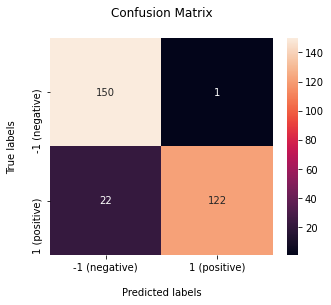

In [7]:
majority_vote = utils.vote_majority(L_test, 
                                    tie_policy = TIE_POLICY)
mv_scores = utils.score(y_test, 
                        majority_vote, 
                        verbose = True, 
                        plot_confusion = True)

## Dummy classifier

In [8]:
# Identify most abundant class.
df_train.Label.value_counts()

 1    723
-1    684
Name: Label, dtype: int64


---------------------------------------------
tn, fp, fn, tp = [  0 191   0 201]
F1             = 0.6779089376053963
Accuracy       = 0.5127551020408163
Precision      = 0.5127551020408163
Recall         = 1.0
ROC AUC        = 0.5
Coverage       = 1.0
---------------------------------------------



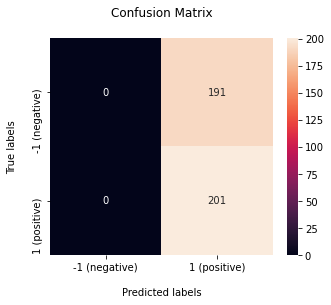

In [9]:
# Dummy classifier: label everything most abundant class.
dummy_scores = utils.score(y_test,
                           np.array([1] * len(y_test)), 
                           verbose = True, 
                           plot_confusion = True)

## Define priors

### Priors based on empirical accuracy of `L_train`

These are our simulated optimal priors, unrealistically obtained.

In [10]:
# Parameters of best performing model yet.
# Target mean of Beta distribution.

# Known accuracies of each synthetic LF on the training set.
# NOTE: Demote 100% accuracies to 99.9999%, otherwise model cannot learn.
empirical_accuracies = [0.876866, 0.987879, 0.938776, 0.979592, 0.737778, 
                        0.999999, 0.732194, 0.625850, 0.833333, 0.594096]

### Priors based on majority vote over `L_train`

These are our heuristic priors, realistically obtained.

In [11]:
# Get priors from majority vote.
priors_mv = utils.get_priors_majority_vote(L_train, remove_zeros = True)
print("\npriors_mv =\n", priors_mv)
print("\nempirical accuracies =\n", empirical_accuracies)

l2_mv = np.linalg.norm(np.array(priors_mv) - np.array(empirical_accuracies))
print("\nL2 (priors_mv - empirical_accuracies) =", l2_mv)


# Estimated accuracies via majority vote = [0.9457013574660633, 0.9621212121212122, 0.7659574468085106, 0.9851851851851852, 0.8872549019607843, 0.9597069597069597, 0.9248366013071896, 0.92, 0.9852941176470589, 0.81859410430839]

priors_mv =
 [0.9457013574660633, 0.9621212121212122, 0.7659574468085106, 0.9851851851851852, 0.8872549019607843, 0.9597069597069597, 0.9248366013071896, 0.92, 0.9852941176470589, 0.81859410430839]

empirical accuracies =
 [0.876866, 0.987879, 0.938776, 0.979592, 0.737778, 0.999999, 0.732194, 0.62585, 0.833333, 0.594096]

L2 (priors_mv - empirical_accuracies) = 0.5063527163009788


## Untrained MAP model


---------------------------------------------
tn, fp, fn, tp = [150   1  22 122]
F1             = 0.9138576779026217
Accuracy       = 0.9220338983050848
Precision      = 0.991869918699187
Recall         = 0.8472222222222222
ROC AUC        = 0.9202998528329654
Coverage       = 0.7525510204081632
---------------------------------------------



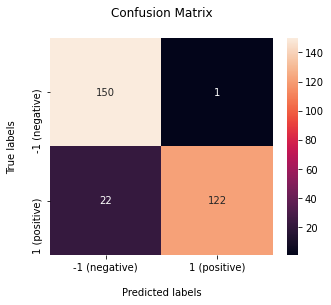

In [12]:
untrained = BayesianDP(INIT_ALPHA,
                       INIT_BETA,
                       priors_alpha = priors_mv)
untrained_pred = untrained.predict(L_test, tie_policy = "abstain")
untrained_scores = utils.score(y_test, 
                               untrained_pred, 
                               verbose = True, 
                               plot_confusion = True)

## Train MAP model

In [13]:
# Instantiate model.
MAP = BayesianDP(alpha = INIT_ALPHA, 
                 beta = INIT_BETA,
                 priors_alpha = priors_mv,
                 prior_strength = STRENGTH)

# Fit model.
scores, losses = MAP.fit(L_train, 
                         L_val = L_val,
                         y_val = y_val,
                         optimizer = OPTIMIZER,
                         learning_rate = LEARNING_RATE,
                         tie_policy = TIE_POLICY,
                         epochs = EPOCHS, 
                         early_stopping = True,
                         patience = 2,
                         clip_grads = CLIP_GRADS,
                         verbose = True)


----------------- INITIAL PARAMETERS -----------------
 
• INIT ALPHA   = tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]) 
• INIT BETA    = tensor([0.1905, 0.1173, 0.1045, 0.1045, 0.1599, 0.2281, 0.2495, 0.1045, 0.0512, 0.3852]) 
• PRIORS ALPHA = [(1000.0, 57.41626739501953), (1000.0, 39.370079040527344), (1000.0, 305.5555419921875), (1000.0, 15.037593841552734), (1000.0, 127.07182312011719), (1000.0, 41.98473358154297), (1000.0, 81.27208709716797), (1000.0, 86.9565200805664), (1000.0, 14.925373077392578), (1000.0, 221.6066436767578)]

----------------- EPOCH 0 -----------------
 
• TRAIN LOSS = 8040.4736328125
• VAL   LOSS = 2090.459228515625
• ALPHA      = tensor([0.7379, 0.7381, 0.7319, 0.7390, 0.7364, 0.7380, 0.7374, 0.7371, 0.7389, 0.7334]) 
• BETA       = tensor([0.1905, 0.1173, 0.1045, 0.1045, 0.1599, 0.2281, 0.2495, 0.1045, 0.0512, 0.3852])
• ALPHA GRAD = tensor([-3.5009, -3.6343, -0.4215, -4.0738, -2.7378, -3.5587, -3.2411, -3.1083, -4.0053, -1.1801])

----------------- EPOC

## Predict


---------------------------------------------
tn, fp, fn, tp = [150   1  19 125]
F1             = 0.9259259259259259
Accuracy       = 0.9322033898305084
Precision      = 0.9920634920634921
Recall         = 0.8680555555555556
ROC AUC        = 0.9307165194996321
Coverage       = 0.7525510204081632
---------------------------------------------



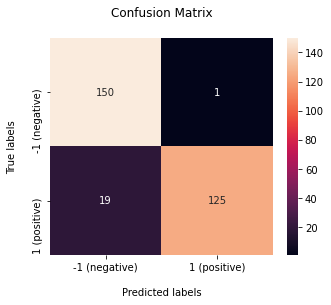

In [14]:
# Predict on test matrix.
y_pred = MAP.predict(L_test, 
                     p_y = 0.5,
                     p_abstain = 0.5,
                     force_abstain = True,
                     tie_policy = "abstain", 
                     return_proba = False)

# Score test set predictions.
test_scores = utils.score(y_test,
                          y_pred,
                          verbose = True, 
                          plot_confusion = True)

## Train-test pipeline


----------------- INITIAL PARAMETERS -----------------
 
• INIT ALPHA   = tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]) 
• INIT BETA    = tensor([0.1905, 0.1173, 0.1045, 0.1045, 0.1599, 0.2281, 0.2495, 0.1045, 0.0512, 0.3852]) 
• PRIORS ALPHA = [(1000.0, 57.41626739501953), (1000.0, 39.370079040527344), (1000.0, 305.5555419921875), (1000.0, 15.037593841552734), (1000.0, 127.07182312011719), (1000.0, 41.98473358154297), (1000.0, 81.27208709716797), (1000.0, 86.9565200805664), (1000.0, 14.925373077392578), (1000.0, 221.6066436767578)]

----------------- EPOCH 0 -----------------
 
• TRAIN LOSS = 8040.4736328125
• VAL   LOSS = 2090.459228515625
• ALPHA      = tensor([0.7379, 0.7381, 0.7319, 0.7390, 0.7364, 0.7380, 0.7374, 0.7371, 0.7389, 0.7334]) 
• BETA       = tensor([0.1905, 0.1173, 0.1045, 0.1045, 0.1599, 0.2281, 0.2495, 0.1045, 0.0512, 0.3852])
• ALPHA GRAD = tensor([-3.5009, -3.6343, -0.4215, -4.0738, -2.7378, -3.5587, -3.2411, -3.1083, -4.0053, -1.1801])

----------------- EPOC

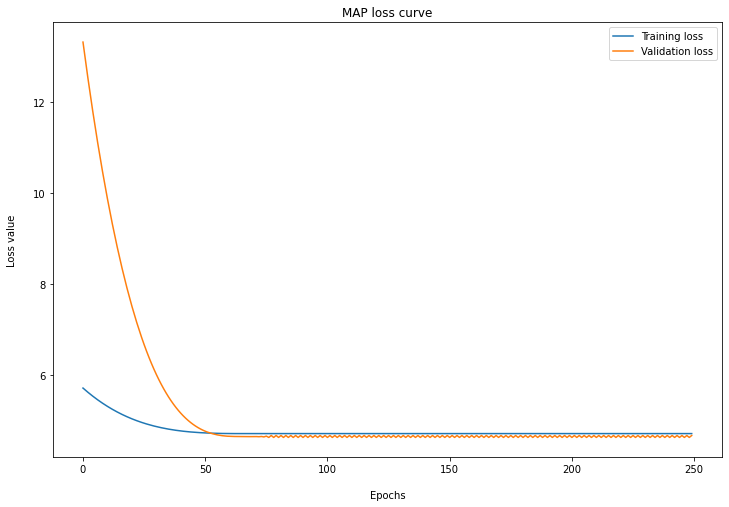


• MAP ALPHA  = tensor([0.9424, 0.9599, 0.7428, 0.9863, 0.8680, 0.9543, 0.9067, 0.9073, 0.9848, 0.7484]) 
• MAP BETA   = tensor([0.1905, 0.1173, 0.1045, 0.1045, 0.1599, 0.2281, 0.2495, 0.1045, 0.0512, 0.3852])

--- L2 norms: ---

L2 norm of (priors_alpha - final_alpha): 0.080


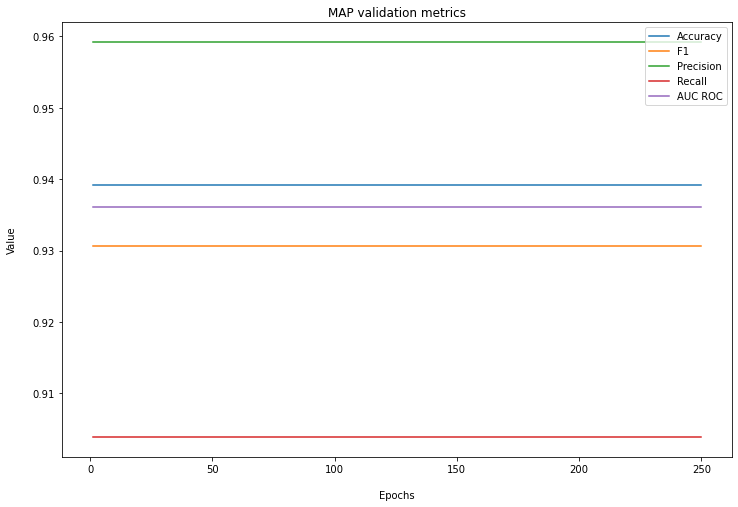


--- FINAL TEST SCORES ---


---------------------------------------------
tn, fp, fn, tp = [150   1  19 125]
F1             = 0.9259259259259259
Accuracy       = 0.9322033898305084
Precision      = 0.9920634920634921
Recall         = 0.8680555555555556
ROC AUC        = 0.9307165194996321
Coverage       = 0.7525510204081632
---------------------------------------------



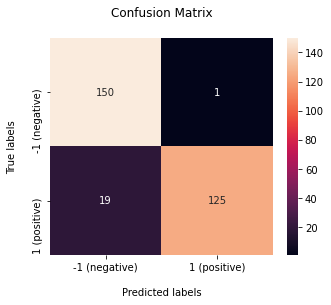

[0.9322033898305084,
 0.9259259259259259,
 0.9920634920634921,
 0.8680555555555556,
 0.9307165194996321,
 0.7525510204081632]

In [15]:
trainer.train_test_score(L_train,
                         L_val,
                         L_test, 
                         y_val,
                         y_test,
                         INIT_ALPHA,
                         INIT_BETA,
                         OPTIMIZER,
                         priors_mv,
                         tie_policy = "abstain",
                         prior_strength = STRENGTH,
                         epochs = EPOCHS,
                         learning_rate = LEARNING_RATE,
                         early_stopping = True,
                         patience = 2,
                         clip_grads = 10,
                         verbose = True)